In [51]:
%matplotlib inline
import numpy as np
from matplotlib import cm
from numpy import sin, cos, deg2rad as d2r
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as ax3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
from IPython.display import HTML, Image

In [173]:
def distance(X, Y, Xg, Yg):
    return np.sqrt((Xg - X)**2 + (Yg - Y)**2)


def gradient(X,Y,Xg,Yg):
    C = distance(X, Y, Xg, Yg)
    C[np.where(C == 0)] = 0.0001
    dx = (X-Xg)/C
    dy = (Y-Yg)/C
    return dx, dy

#R is the radius of potential field around the obstacles
def distanceobstacles(X, Y, obstacles, R):
    obstaclesfield = np.zeros_like(distancefield)

    for coord in obstacles:
        #Calculate distance to obstacle
        distances = distance(X, Y, X[coord[0]], Y[coord[1]])
        
        #change the zeros to something small to avoid zero division
        distances[np.where(distances == 0)] = 0.0001
        
        # zero = np.where(distances > 0.25)
        ob = np.where(distances <= 0.25)
        
        # Set the radius around the obstacles
        obstaclesfield[ob] += np.log(0.25/distances[ob])
        
    return obstaclesfield

def gradientobstacles(X, Y, Xg, Yg, obstacles, R):
    


0.0 -1.0


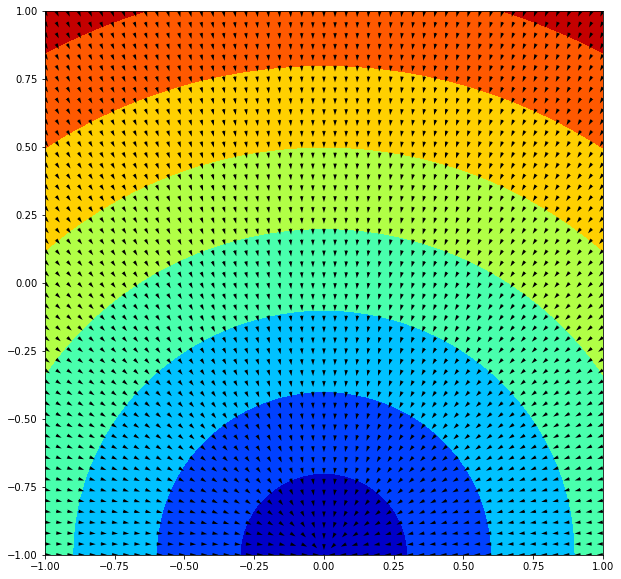

In [172]:
size = 51

x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)

#meshgrid representing the field
xx, yy = np.meshgrid(x,y)

goalx = xx[int(size/2)][int(size/2)]
goaly = yy[0][0]

print(goalx, goaly)

#distances of each point to goal
distancefield = distance(xx, yy, goalx, goaly) 

dx, dy = gradient(xx, yy, goalx, goaly)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.scatter(xx, yy, s=0.1, color = "black")
# ax.scatter(startx,starty, color = "red")
# ax.scatter(x, y, s=0.1, color = "black")
# ax.quiver(xx, yy, distancefield)
ax.contourf(xx,yy, distancefield, cmap = 'jet')
ax.quiver(xx, yy, -dx, -dy)

# ax.scatter3D(xyz[:, 0], xyz[: ,1], xyz[:, 2], s = 5, c='blue')
plt.show()


In [145]:
obstacles = []
for i in range(5):
    obstacles.append(tuple(map(tuple,np.random.randint(size, size=(2,2)))))

In [194]:
print(obstacles)

[((49, 35), (45, 42)), ((9, 36), (40, 14)), ((48, 4), (24, 10)), ((14, 11), (7, 23)), ((13, 30), (1, 11))]


In [208]:
#starting particle placement
startx = xx[int(size/2)][int(size/2)]
starty = yy[int(size/2)][int(size/2)]

startx2 = xx[30][30]
starty2 = yy[30][30]

# particles = [(xx[25][25], yy[25][25])]
# print(particles)
particles = [((25, 25), (25, 25)) , ((30, 30) , (30,30))]
# for i in range(2):
#     particles.append(tuple(map(tuple,np.random.randint(size, size=(2,2)))))

In [212]:
particlesdistances = distanceobstacles(xx, yy, particles, 0.5)
obstaclesdistances = distanceobstacles(xx, yy, obstacles, 0.25)

## Potential fields of the obstacles

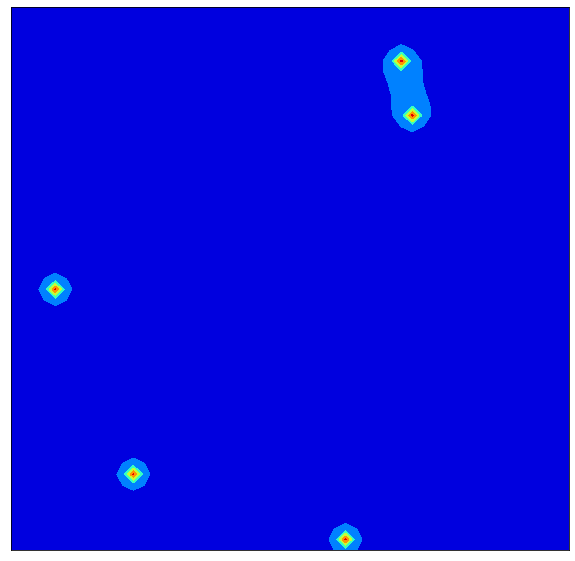

In [234]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.scatter(xx, yy, s=0.1, color = "black")
# ax.scatter(startx,starty, color = "red")
# ax.scatter(x, y, s=0.1, color = "black")
# ax.quiver(xx, yy, distancefield)
ax.contourf(xx,yy, obstaclesdistances, cmap = 'jet')
# ax.plot_surface(xx,yy, -obstaclesfield + distancefield)
plt.show()

In [ ]:
dx, dy = gradient(xx, yy, goalx, goaly)


## Particles and Obstacles labeled

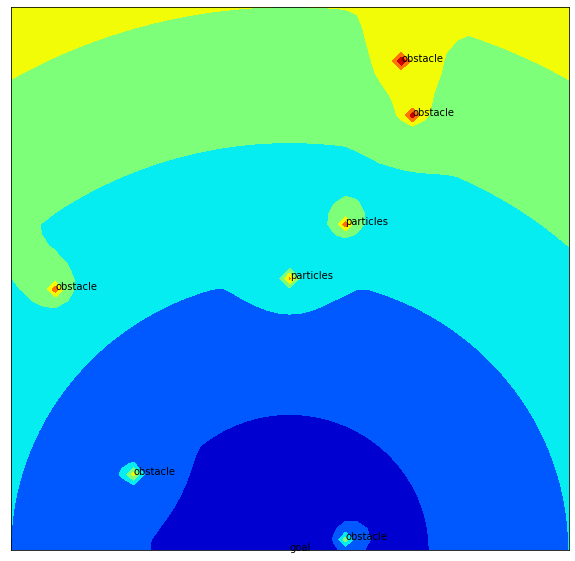

In [242]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# ax.contourf(xx,yy, obstaclesfield)
ax.contourf(xx,yy, obstaclesdistances/5 + distancefield + particlesdistances/5, cmap = 'jet')

for coord in obstacles:
    plt.text(xx[coord[0]],yy[coord[1]], "obstacle")
    
for coord in particles:
    plt.text(xx[coord[0]],yy[coord[1]], "particles")

plt.text(goalx, goaly, "goal")
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
    
plt.show()

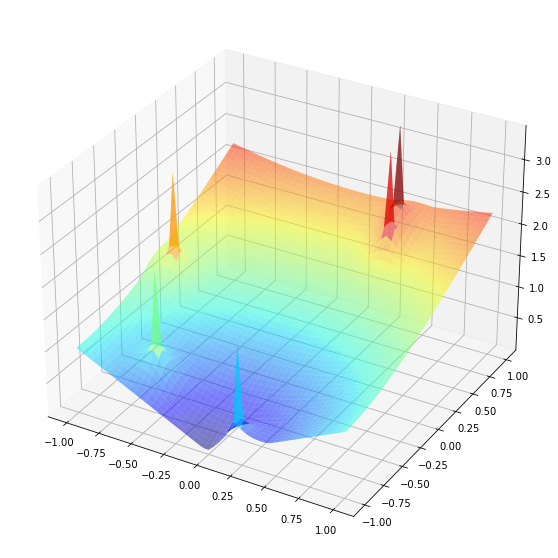

In [243]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx,yy, distancefield + obstaclesfield/5 , cmap = 'jet', rstride=1, cstride=1, alpha=0.5)
# ax.contour(xx, yy, distancefield + obstaclesfield)
# ax.contour(xx, yy, distancefield + obstaclesfield, cmap="jet", linestyles="solid", offset=-1)

plt.show()